## Key Causal Signals Appear in Clusters 2 and 3

each row represents the caused variable and each column represents the causing variable

This function should return a pd.DataFrame of the shape (5, 5), representing the  𝑝
 -value matrix for all pairwise Granger Causality tests.

 

In [32]:
import pycaret
from pycaret.clustering import *
import pandas as pd
import datetime
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

import seaborn as sns

#get most recent clustering element, or specify by name
fn = 'efficiency_metric/2023-08-14 10:37:50.csv'
ec = pd.read_csv(fn)
ec.head()

,Unnamed: 0.1,Unnamed: 0,group,time,s_MP,change,type,length,sum_change,s_area,...,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster,efficiency
0,0,0,1,1.660222e+12,29.99,0.317588,surge,1,0.317588,0.317588,...,30.00,7349599.5,1.229796e+09,716681.94,314676.40,6.0,-0.004943,-0.029656,Cluster 2,3.25%
1,1,1,3,1.660222e+12,29.85,0.000469,surge,1,0.000469,0.000469,...,29.90,7307990.0,1.229792e+09,715352.90,314642.84,1.0,0.000402,0.000402,Cluster 2,3.25%
2,2,2,5,1.660222e+12,29.87,0.001105,surge,2,0.001607,0.003214,...,29.92,7285245.0,1.229754e+09,714476.10,313576.00,4.0,-0.002773,-0.011090,Cluster 2,3.25%
3,3,3,7,1.660222e+12,29.89,0.001610,surge,1,0.001610,0.001610,...,29.88,7318707.0,1.229744e+09,715730.56,313546.60,2.0,-0.000200,-0.000400,Cluster 2,3.25%
4,4,4,9,1.660223e+12,29.90,0.001372,surge,1,0.001372,0.001372,...,29.93,7280582.0,1.229794e+09,714140.10,314889.38,7.0,-0.013670,-0.095690,Cluster 2,3.25%


In [33]:
ec.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'group', 'time', 's_MP', 'change', 'type',
       'length', 'sum_change', 's_area', 'surge_area', 'p_group', 'p_time',
       'p_change', 'p_type', 'p_MP', 'p_buyCap', 'p_askCap', 'p_totalBidVol',
       'p_totalAskVol', 'p_length', 'p_sum_change', 'p_area', 'Cluster',
       'efficiency'],
      dtype='object')

In [34]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults, VARResultsWrapper

def test_granger(df, p):
    """
    Fits a VAR(p) model on the input df and performs pairwise Granger Causality tests
    """
     # Fit VAR model on first-order differences
    model = VAR(df.diff().dropna())
    results = model.fit(p)
    
    # Initialize p-value matrix
    p_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    # Perform pairwise Granger Causality tests
    for caused in df.columns:
        for causing in df.columns:
            if caused != causing:
                test_result = results.test_causality(caused, causing)
                p_value = test_result.pvalue
                p_matrix.loc[caused, causing] = p_value
    # Ensure all columns have float dtype
    p_matrix = p_matrix.astype(float)
    return p_matrix

# Load data
p=7
setx=['p_MP', 'p_change', 'p_buyCap', 'p_askCap', 'p_totalBidVol','p_totalAskVol',]

## Cluster 0 GC

In [35]:
sendit0 = ec[ec['Cluster']=='Cluster 0'][setx]
p_matrix0 = test_granger(sendit0, p)
# p_matrix0
caul_mtrx = p_matrix0.rename(index={item: f"{item} caused by" for item in p_matrix0.index})
caul_mtrx.where(caul_mtrx.isna(), caul_mtrx <= 0.01)

,p_MP,p_change,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol
p_MP caused by,NaN,False,False,False,False,False
p_change caused by,False,NaN,False,False,False,False
p_buyCap caused by,False,False,NaN,False,False,False
p_askCap caused by,False,False,False,NaN,False,False
p_totalBidVol caused by,False,False,False,False,NaN,False
p_totalAskVol caused by,False,False,False,False,False,NaN


## Cluster 1

In [36]:
sendit1 = ec[ec['Cluster']=='Cluster 1'][setx]
p_matrix1 = test_granger(sendit1, p)
# p_matrix0
caul_mtrx1 = p_matrix1.rename(index={item: f"{item} caused by" for item in p_matrix1.index})
caul_mtrx1.where(caul_mtrx1.isna(), caul_mtrx1 <= 0.01)

,p_MP,p_change,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol
p_MP caused by,NaN,False,False,False,False,False
p_change caused by,False,NaN,False,False,False,False
p_buyCap caused by,False,False,NaN,True,False,True
p_askCap caused by,False,False,False,NaN,False,False
p_totalBidVol caused by,False,False,False,True,NaN,True
p_totalAskVol caused by,False,False,False,False,False,NaN


## Cluster 2

In [37]:
sendit2 = ec[ec['Cluster']=='Cluster 2'][setx]
p_matrix2 = test_granger(sendit2, p)
# p_matrix0
caul_mtrx2 = p_matrix2.rename(index={item: f"{item} caused by" for item in p_matrix2.index})
caul_mtrx2.where(caul_mtrx2.isna(), caul_mtrx2 <= 0.01)

,p_MP,p_change,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol
p_MP caused by,NaN,False,False,False,False,False
p_change caused by,False,NaN,False,False,False,True
p_buyCap caused by,False,False,NaN,False,False,True
p_askCap caused by,False,False,False,NaN,False,False
p_totalBidVol caused by,False,False,True,False,NaN,False
p_totalAskVol caused by,False,True,False,False,False,NaN


<Axes: >

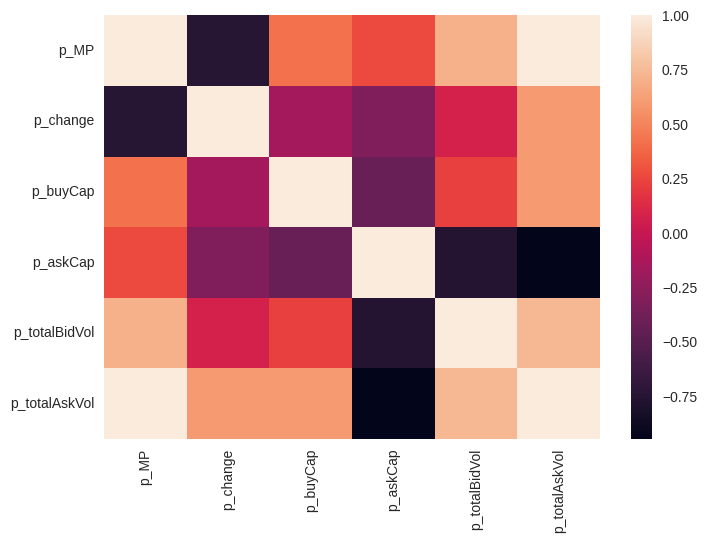

In [38]:
sns.heatmap(p_matrix2.corr())

## Cluster 3: largest space for profitable trades 
(length = duration, height = positive variance)

In [39]:
sendit3 = ec[ec['Cluster']=='Cluster 3'][setx]
p_matrix3 = test_granger(sendit3, p)
# p_matrix0
caul_mtrx3 = p_matrix3.rename(index={item: f"{item} caused by" for item in p_matrix3.index})
caul_mtrx3.where(caul_mtrx3.isna(), caul_mtrx3 <= 0.01)

,p_MP,p_change,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol
p_MP caused by,NaN,False,False,False,False,False
p_change caused by,True,NaN,False,False,False,False
p_buyCap caused by,False,False,NaN,False,False,False
p_askCap caused by,False,False,False,NaN,False,False
p_totalBidVol caused by,False,False,False,False,NaN,False
p_totalAskVol caused by,True,False,False,False,False,NaN


## Cluster 3 regression study
highest performing cluster for length x height

In [40]:
## correlation matrix
p_matrix3.corr()

,p_MP,p_change,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol
p_MP,1.000000,0.941454,-0.010788,0.332807,0.819571,-0.215800
p_change,0.941454,1.000000,0.366811,-0.564463,0.735273,0.805336
p_buyCap,-0.010788,0.366811,1.000000,-0.601310,0.819700,0.463521
p_askCap,0.332807,-0.564463,-0.601310,1.000000,-0.102884,-0.866259
p_totalBidVol,0.819571,0.735273,0.819700,-0.102884,1.000000,0.485567
p_totalAskVol,-0.215800,0.805336,0.463521,-0.866259,0.485567,1.000000


**positively correlated**: p_change / p_MP

**negatively**: p_askCap / p_totalAskVol
            p_askCap / p_totalAskVol

<Axes: >

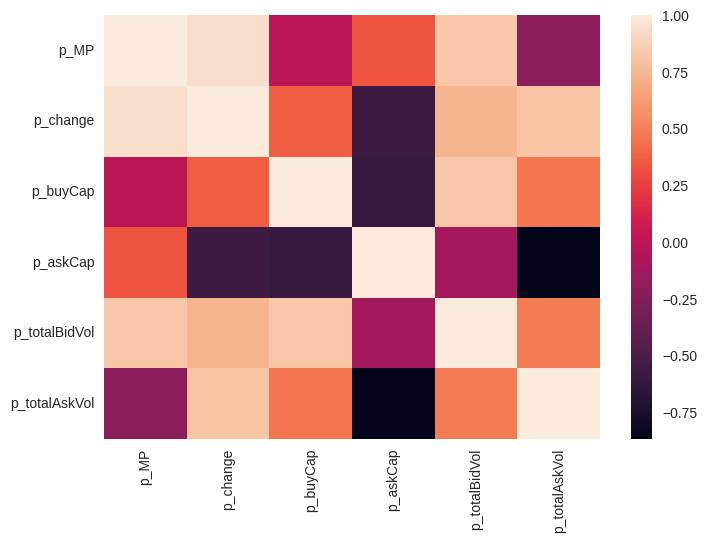

In [41]:
sns.heatmap(p_matrix3.corr())

## multi-model regression on surge area

[from](https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb)

In [44]:
s = setup(ec, target = 's_MP', session_id = 42)

exp = RegressionExperiment()

exp.setup(ec, target = 's_MP', session_id = 42)



,Description,Value
0,Session id,42
1,Target,s_MP
2,Target type,Regression
3,Original data shape,"(5571, 25)"
4,Transformed data shape,"(5571, 31)"
5,Transformed train set shape,"(3899, 31)"
6,Transformed test set shape,"(1672, 31)"
7,Numeric features,20
8,Categorical features,4
9,Rows with missing values,0.0%


,Description,Value
0,Session id,42
1,Target,s_MP
2,Target type,Regression
3,Original data shape,"(5571, 25)"
4,Transformed data shape,"(5571, 31)"
5,Transformed train set shape,"(3899, 31)"
6,Transformed test set shape,"(1672, 31)"
7,Numeric features,20
8,Categorical features,4
9,Rows with missing values,0.0%


In [45]:
best =compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0554,0.0131,0.1085,0.9988,0.0063,0.0034,0.6520
lightgbm,Light Gradient Boosting Machine,0.0540,0.0136,0.1106,0.9988,0.0063,0.0033,120.4210
et,Extra Trees Regressor,0.0530,0.0150,0.1169,0.9987,0.0068,0.0032,0.4320
rf,Random Forest Regressor,0.0560,0.0161,0.1224,0.9985,0.0071,0.0034,0.8710
dt,Decision Tree Regressor,0.0729,0.0242,0.1511,0.9978,0.0088,0.0045,0.0820
knn,K Neighbors Regressor,0.1156,0.0462,0.2113,0.9958,0.0120,0.0070,0.0780
ada,AdaBoost Regressor,0.2627,0.1193,0.3435,0.9893,0.0205,0.0167,0.1740
en,Elastic Net,0.3409,0.2248,0.4728,0.9799,0.0295,0.0224,0.0860
lasso,Lasso Regression,0.3826,0.2836,0.5309,0.9746,0.0332,0.0252,0.0860
lr,Linear Regression,0.0908,5.6879,0.8459,0.4972,0.0179,0.0063,0.0660


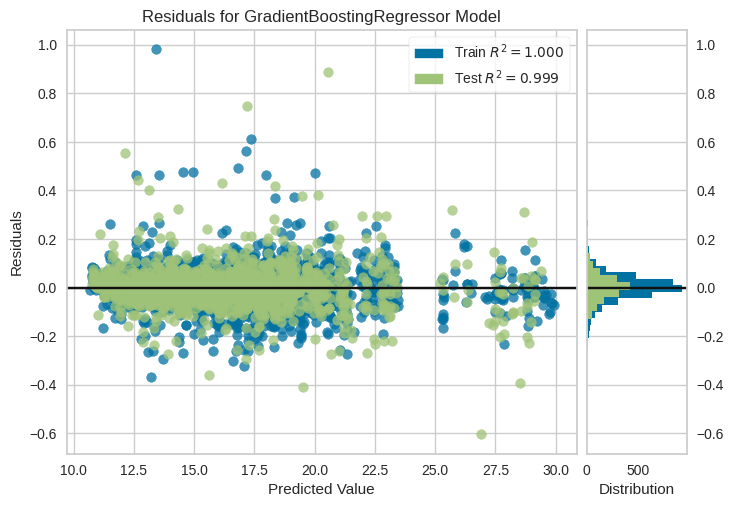

In [46]:
# plot residuals
plot_model(best, plot = 'residuals')

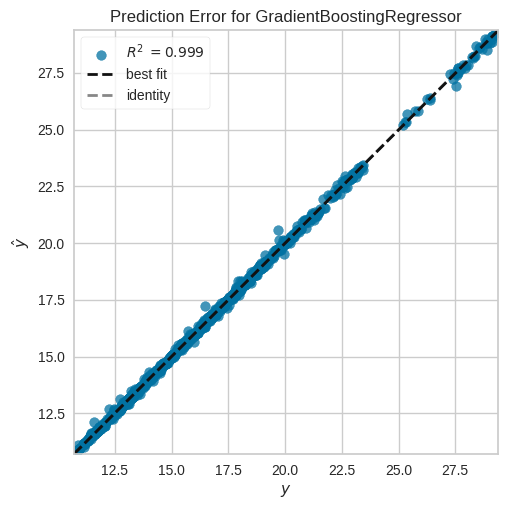

In [47]:
# plot error
plot_model(best, plot = 'error')

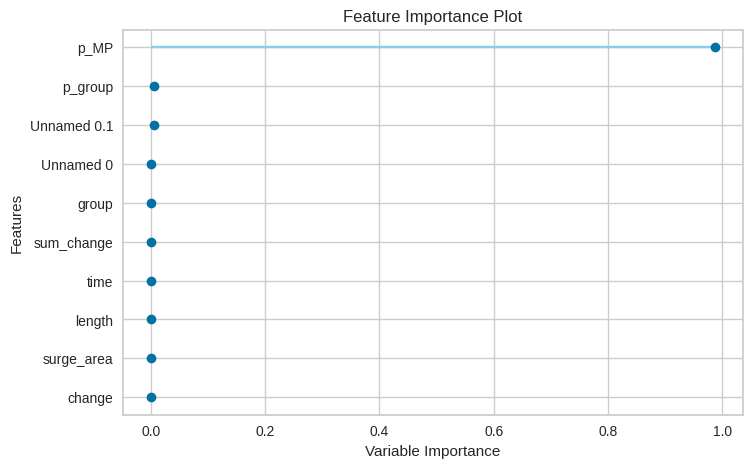

In [48]:
# plot feature importance
plot_model(best, plot = 'feature')

In [49]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…